1.  Mostraremos la manera de trabajar con tensores representándolos como arreglos o matrices. 

In [1]:
import sympy
from sympy import *
from sympy.vector import CoordSys3D
init_printing()

Consideremos la siguiente transformación de coordenadas esféricas a cartesianas:

In [2]:
r, θ, ϕ = symbols('r θ ϕ', positive=True)
N = CoordSys3D('N')
x = r*cos(ϕ)*sin(θ)
y = r*sin(ϕ)*sin(θ)
z = r*cos(θ)
display(x,y,z)

Escribamos los vectores base de nuestras coordenadas esféricas en términos de los vectores base cartesianos:

In [3]:
e_r = x.diff(r) * N.i + y.diff(r) * N.j + z.diff(r) * N.k
e_th = x.diff(θ) * N.i + y.diff(θ) * N.j + z.diff(θ) * N.k
e_ph = x.diff(ϕ) * N.i + y.diff(ϕ) * N.j + z.diff(ϕ) * N.k
display(e_r)
display(e_th)
display(e_ph)

Ahora calculamos la longitud al cuadrado de los vectores de base esférica:

In [4]:
display(e_r.dot(e_r).simplify())
display(e_th.dot(e_th).simplify())
display(e_ph.dot(e_ph).simplify())

El tensor métrico:

In [5]:
g = Matrix( [ [e_r.dot(e_r).simplify(), 0, 0], \
            [0, e_th.dot(e_th).simplify(), 0], \
            [0, 0, e_ph.dot(e_ph).simplify()] ])
g

⎡1  0       0     ⎤
⎢                 ⎥
⎢    2            ⎥
⎢0  r       0     ⎥
⎢                 ⎥
⎢        2    2   ⎥
⎣0  0   r ⋅sin (θ)⎦

La métrica inversa:

In [6]:
g_inv = g.inv()
g_inv 

⎡1  0       0     ⎤
⎢                 ⎥
⎢   1             ⎥
⎢0  ──      0     ⎥
⎢    2            ⎥
⎢   r             ⎥
⎢                 ⎥
⎢           1     ⎥
⎢0  0   ──────────⎥
⎢        2    2   ⎥
⎣       r ⋅sin (θ)⎦

La matriz de transformación, ecuaciones (\ref{derivaesfericas}), se obtiene así:

In [7]:
Mt = Matrix( [ [x.diff(r), x.diff(θ), x.diff(ϕ)], \
            [y.diff(r), y.diff(θ), y.diff(ϕ)], \
            [z.diff(r), z.diff(θ), z.diff(ϕ)] ])
Mt

⎡sin(θ)⋅cos(ϕ)  r⋅cos(θ)⋅cos(ϕ)  -r⋅sin(θ)⋅sin(ϕ)⎤
⎢                                                ⎥
⎢sin(θ)⋅sin(ϕ)  r⋅sin(ϕ)⋅cos(θ)  r⋅sin(θ)⋅cos(ϕ) ⎥
⎢                                                ⎥
⎣   cos(θ)         -r⋅sin(θ)            0        ⎦

El vector posición:

In [8]:
rp=r*sin(θ)*cos(ϕ)*N.i + r*sin(θ)*sin(ϕ)*N.j + r*cos(θ)*N.k
rp

Los factores de escala:

In [9]:
hr=rp.diff(r).magnitude().simplify()
hth=rp.diff(θ).magnitude().simplify()
hpi=rp.diff(ϕ).magnitude().simplify()
display(hr,hth,hpi)

Para finalizar, veamos a continuación como obtener la métrica y los factores de escala para las coordenadas toroidales. (Ver \ref{CoordenadasToroidales})

In [10]:
a, τ, ϕ, σ = symbols('a τ ϕ σ ', positive=True)
x=(a*sinh(τ)*cos(ϕ))/(cosh(τ)-cos(σ))
y=(a*sinh(τ)*sin(ϕ))/(cosh(τ)-cos(σ))
z=a*sin(σ)/(cosh(τ)-cos(σ))

In [11]:
e_ta = x.diff(τ).trigsimp() * N.i + y.diff(τ).trigsimp() * N.j + z.diff(τ).trigsimp() * N.k
e_pi = x.diff(ϕ).trigsimp() * N.i + y.diff(ϕ).trigsimp() * N.j + z.diff(ϕ).trigsimp() * N.k
e_si = x.diff(σ).trigsimp() * N.i + y.diff(σ).trigsimp() * N.j + z.diff(σ).trigsimp() * N.k

In [12]:
g = Matrix( [ [e_ta.dot(e_ta).simplify(), 0, 0], \
            [0, e_pi.dot(e_pi).simplify(), 0], \
            [0, 0, e_si.dot(e_si).simplify()] ])
g

⎡  2 ⎛   2                             2       ⎞                              
⎢-a ⋅⎝sin (σ) + 2⋅cos(σ)⋅cosh(τ) - cosh (τ) - 1⎠                              
⎢────────────────────────────────────────────────           0                 
⎢                                4                                            
⎢              (cos(σ) - cosh(τ))                                             
⎢                                                                             
⎢                                                       2     2               
⎢                                                      a ⋅sinh (τ)            
⎢                       0                          ───────────────────        
⎢                                                                    2        
⎢                                                  (cos(σ) - cosh(τ))         
⎢                                                                             
⎢                                                   

In [13]:
h1= sqrt(g[0,0]).trigsimp()
h2= sqrt(g[1,1]).trigsimp()
h3= sqrt(g[2,2]).trigsimp()
h1,h2,h3

2. Dado el segmento de la hélice 
$$
C(t) = \left[2\cos(t), 2\ \, \mathrm{sen}(t), 4t\right]
$$


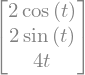

In [14]:
t, s = symbols('t s', positive=True)
C = Matrix([2*cos(t),2*sin(t),4*t])
C

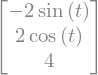

In [15]:
dC=C.diff(t)
dC

Buscamos la relación entre los parámetros $s$ y $t$

In [16]:
p=integrate(sqrt(dC.dot(dC)),(t,0,t)).simplify()

Por lo tanto, en función del parámetro $s$ el vector posición es:

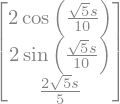

In [17]:
rs=Matrix([2*cos(s/(2*sqrt(5))),2*sin(s/(2*sqrt(5))),2*s/sqrt(5)])
rs

El vector tangente a la curva es

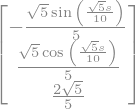

In [18]:
τ=rs.diff(s)
τ

La curvatura:

In [19]:
κ = sqrt(τ.diff(s).dot(τ.diff(s))).simplify()
κ

El vector normal

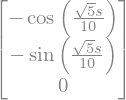

In [20]:
n = 1/κ*τ.diff(s)
n

Y el binormal:

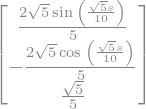

In [21]:
b = simplify(τ.cross(n))
b

La torsión:

In [22]:
tor=-n.dot(b.diff(s)).simplify()
tor

Podemos comprobar que cada uno de los vectores es unitario.

In [23]:
sqrt(τ.dot(τ)).simplify() , sqrt(n.dot(n)).simplify(), sqrt(b.dot(b)).simplify()

Y que se satisfacen las fórmulas de de Frenet-Serret.

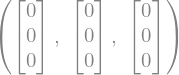

In [24]:
τ.diff(s)-κ*n , b.diff(s)+tor*n, n.diff(s)-tor*b + κ*τ

3. Consideremos el siguiente tensor en coordenadas cartesianas
$$
T_j^i=\left(\begin{array}{lll}
2 & 1 & 3 \\
2 & 3 & 4 \\
1 & 2 & 2
\end{array}\right)
$$

y nuestro  deseo es escribirlo en coordenadas cilíndricas. Escribamos el jacobiano de la transformación


In [25]:
ρ, ϕ = symbols('ρ ϕ ', positive=True)
x= ρ*cos(ϕ)
y= ρ*sin(ϕ)
z=z

In [26]:
J = Matrix( [ [x.diff(ρ), x.diff(ϕ),0], \
            [y.diff(ρ),  y.diff(ϕ), 0], \
            [z.diff(ρ),  z.diff(ϕ), 1] ])
J

⎡cos(ϕ)  -ρ⋅sin(ϕ)  0⎤
⎢                    ⎥
⎢sin(ϕ)  ρ⋅cos(ϕ)   0⎥
⎢                    ⎥
⎣  0         0      1⎦

Escribimos la matrz

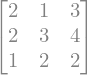

In [27]:
T =  Matrix([ [ 2,1,3], [2,3, 4],[ 1, 2,2] ])
T

Por lo tanto:
$$
T_{m^{\prime}}^{k^{\prime}}=\frac{\partial x^{k^{\prime}}}{\partial x^i} T_j^i \frac{\partial x^j}{\partial x^{m^{\prime}}}
$$

In [28]:
simplify(J.inv()*(T)*J)

⎡                                               ⎛     3                       
⎢3⋅sin(ϕ) + 3⋅sin(3⋅ϕ) + 9⋅cos(ϕ) - cos(3⋅ϕ)    ⎜  sin (ϕ)        2           
⎢───────────────────────────────────────────  ρ⋅⎜- ─────── - 3⋅sin (ϕ) + tan(ϕ
⎢                  4⋅cos(ϕ)                     ⎝   cos(ϕ)                    
⎢                                                                             
⎢         sin(2⋅ϕ) + 3⋅cos(2⋅ϕ) + 1                  3⋅sin(2⋅ϕ)   cos(2⋅ϕ)   5
⎢         ─────────────────────────                - ────────── + ──────── + ─
⎢                    2⋅ρ                                 2           2       2
⎢                                                                             
⎣             2⋅sin(ϕ) + cos(ϕ)                       ρ⋅(-sin(ϕ) + 2⋅cos(ϕ))  

     ⎞         2                    ⎤
     ⎟  - 3⋅sin (ϕ) + 2⋅sin(2⋅ϕ) + 3⎥
) + 1⎟  ────────────────────────────⎥
     ⎠             cos(ϕ)           ⎥
                                    ⎥
            -3⋅sin(

Podemos evaluar el resultado anterior para algún punto en particular

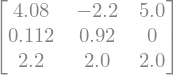

In [29]:
((_).subs({ϕ:atan(S(4)/3),ρ:5})).evalf()

SymPy tiene una librería de Geometría Diferencial que permite definir una variedad 

In [30]:
from sympy.diffgeom import *
m = Manifold('M', 3)
m
m.dim

Un parche de coordenadas, o sistema de coordenadas, es un conjunto abierto simplemente conectado alrededor de un punto en la variedad. En una variedad se puede tener muchos parches que no siempre incluyen la variedad completa. En estos parches se pueden definir gráficos de coordenadas que permiten parametrizar cualquier punto del parche en términos de una tupla de números reales (las coordenadas).

In [31]:
p = Patch('P', m)
p
p.dim

Veamos como definir un sistema de coordenadas cartesiano tridimensional y un sistema de coordenadas polares.

In [32]:
x, y, z = symbols('x y z', real=True)
ρ, θ, ζ = symbols('ρ θ ζ', nonnegative=True)
relation_dict = {
('Car3D', 'Pol'): [(x, y, z), (sqrt(x**2 + y**2), atan(y/x),z)],
('Pol', 'Car3D'): [(ρ, θ, ζ), (ρ*cos(θ), ρ*sin(θ), ζ)]
}
Car3D = CoordSystem('Car3D', p, (x, y, z), relation_dict)
Pol = CoordSystem('Pol', p, (ρ, θ, ζ), relation_dict)

la función "transformation()" devuelve la función de transformación de un sistema de coordenadas a otro. Mientras "transform()" devuelve las coordenadas transformadas.

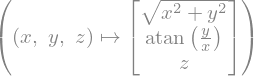

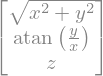

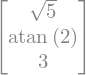

In [33]:
display(Car3D.transformation(Pol), Car3D.transform(Pol), Car3D.transform(Pol, [1, 2, 3]))

La función "jacobian()" devuelve la matriz jacobiana de transformación de coordenadas entre dos sistemas. Mientras "jacobian_determinant()" devuelve el determinante jacobiano de la transformación de coordenadas entre dos sistemas.

In [34]:
Pol.jacobian(Car3D), Pol.jacobian(Car3D, [1, pi/2,pi/3])

⎛⎡cos(θ)  -ρ⋅sin(θ)  0⎤  ⎡0  -1  0⎤⎞
⎜⎢                    ⎥  ⎢        ⎥⎟
⎜⎢sin(θ)  ρ⋅cos(θ)   0⎥, ⎢1  0   0⎥⎟
⎜⎢                    ⎥  ⎢        ⎥⎟
⎝⎣  0         0      1⎦  ⎣0  0   1⎦⎠

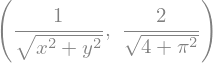

In [35]:
Car3D.jacobian_determinant(Pol), Car3D.jacobian_determinant(Pol, [1,pi/2,pi/3])

4. Dado un sistema genérico de coordenadas oblicuas
$$
\left|  {\mathrm{e}}_{1} \right> =a\left|  \mathrm{i}\right>
+b\left|  \mathrm{j}\right> ;\qquad\left|  {\mathrm{e}}
_{2}\right> =c\left|  \mathrm{i}\right> +d\left|  \mathrm{j}
\right>
$$

In [36]:
a,b,c,d = symbols('a,b,c,d')
e_1 = a*N.i + b*N.j + 0*N.k
e_2 = c*N.i + d*N.j + 0*N.k
display(e_1)
display(e_2) 

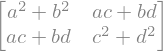

In [37]:
g = Matrix( [ [e_1.dot(e_1).simplify(), e_1.dot(e_2).simplify()], \
            [e_2.dot(e_1).simplify(), e_2.dot(e_2).simplify()]])
g

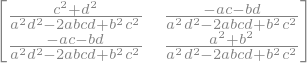

In [38]:
factor(g.inv())

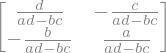

In [39]:
L = Matrix( [ [d/(a*d-b*c),-c/(a*d-b*c)], \
            [-b/(a*d-b*c),a/(a*d-b*c)]  ])
L

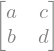

In [40]:
L.inv()

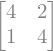

In [41]:
T =  Matrix([[4,2],[1,4]])
T

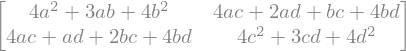

In [42]:
Tnew=simplify(g*L*T*L.inv())
Tnew

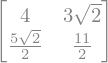

In [43]:
Tnew.subs({a:1,b:0,c:sqrt(2)/2,d:sqrt(2)/2 }).factor()

 6. A continuación, aprovecharemos  la ocasión para mostrar algunas opciones que tienen que ver con los comandos para graficar curvas de nivel. 

Dado el campo de temperaturas 
$$
T=T\left( x,y\right)  =70+180 {e}^{-(x-3)^2/10-(y-2)^2/10} \,,
$$

La vida es mucho más facil si usamos las siguientes librerias

In [44]:
import numpy as np
import matplotlib.pylab as plt

Definimos el campo escalar:

In [45]:
def T(x, y):
    return 70 + 180*np.exp(-(x-3)**2/10 - (y-2)**2/10)

El gráfico más simple que podemos realizar es el siguiente

Text(0, 0.5, 'y')

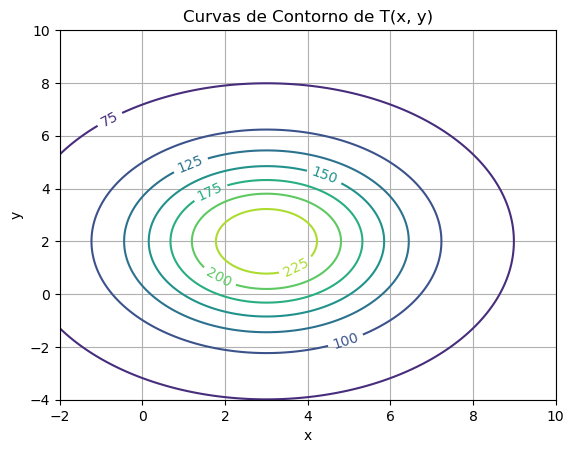

In [46]:
# Crear una malla de puntos (x, y)
x = np.linspace(-2, 10, 400)
y = np.linspace(-4, 10, 400)
X, Y = np.meshgrid(x, y)
Z = T(X, Y)
# Graficar las curvas de contorno
CS = plt.contour(X, Y, Z) 
#  Algunas etiquetas
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Curvas de Contorno de T(x, y)')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Otra perspectiva es 

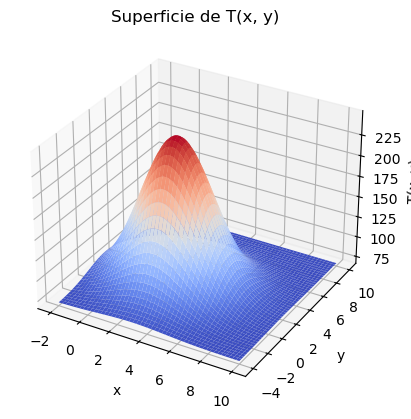

In [47]:
from mpl_toolkits.mplot3d import Axes3D
# Graficar la función en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_title('Superficie de T(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T(x, y)')
plt.show()

También se pueden resaltar las curvas de nivel

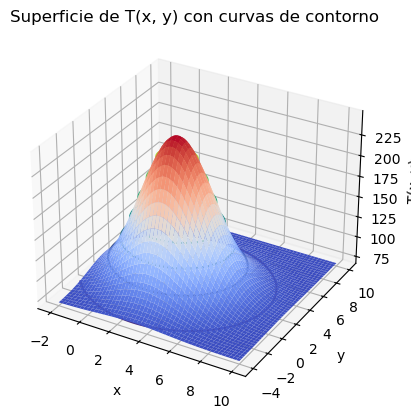

In [48]:
# Graficar la superficie tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
# Graficar curvas de contorno
ax.contour(X, Y, Z, cmap='viridis')
# Configuración de etiquetas y título
ax.set_title('Superficie de T(x, y) con curvas de contorno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T(x, y)')
plt.show()

También podemos agregar una barra de colores

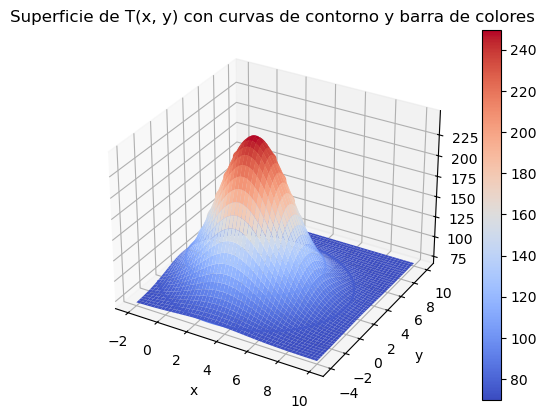

In [49]:
# Graficar la superficie tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
# Graficar curvas de contorno sobre la superficie
ax.contour(X, Y, Z, cmap='coolwarm')
# Agregar una barra de colores
fig.colorbar(surf)
# Configuración de etiquetas y título
ax.set_title('Superficie de T(x, y) con curvas de contorno y barra de colores')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T(x, y)')
plt.show()